# EDA

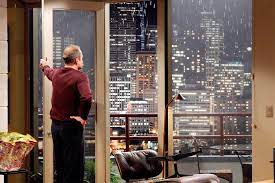

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Path to the CSV file
file_path = 'data/king_county_housing.csv'

# Load the data
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


     house_id  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  7129300520     3.000      1.000     1180.000   1.000         NaN 0.000   
1  6414100192     3.000      2.250     2570.000   2.000       0.000 0.000   
2  5631500400     2.000      1.000      770.000   1.000       0.000 0.000   
3  2487200875     4.000      3.000     1960.000   1.000       0.000 0.000   
4  1954400510     3.000      2.000     1680.000   1.000       0.000 0.000   

   condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode    lat  \
0          3      7    1180.000  ...      1955         0.000    98178 47.511   
1          3      7    2170.000  ...      1951     19910.000    98125 47.721   
2          3      6     770.000  ...      1933           NaN    98028 47.738   
3          5      7    1050.000  ...      1965         0.000    98136 47.521   
4          3      8    1680.000  ...      1987         0.000    98074 47.617   

      long  sqft_living15  sqft_lot15        date      p

Description:
I loaded the dataset into a DataFrame from the CSV file new_king_county_housing.csv. The data.head() function displays the first five rows of the dataset.

Observations:

The dataset contains a mix of 0.000 values and NaN (Not a Number) values.

0.000 Values: These could represent actual zero values or missing data that was entered as zero. For example, waterfront and view columns show 0.000, which may indicate that the property does not have a waterfront view or a view, respectively.

NaN Values: These represent missing data and are found in columns like waterfront and yr_renovated. Missing values need to be handled appropriately, either by imputation or removal, to ensure accurate analysis.

Result:
The initial data inspection reveals the presence of both 0.000 and NaN values, which should be considered in the data cleaning process to prevent misinterpretation during analysis.

In [4]:
# Overview of the data structure
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   floors         21597 non-null  float64
 5   waterfront     19206 non-null  float64
 6   view           21534 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21145 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17749 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  float64
 17  sqft_lot15     21597 non-null  float64
 18  date  

Description:
In this step, we explore the basic structure and statistics of the dataset to understand its composition and identify potential issues. The data.info() function gives an overview of the dataset, including the number of non-null values in each column and data types.

Observations:

Missing Values:

waterfront: This column has 1,391 missing values, which means 1,391 entries do not have data regarding whether the property is waterfront or not.

view: There are 63 missing values in this column, indicating that 63 entries are missing information about the view quality of the property.

sqft_basement: This column has 452 missing values, suggesting that the basement size information is missing for these entries.

yr_renovated: There are 3,848 missing values, which likely indicates that many properties have not been renovated.

Data Types:

date column is of type object. This column needs to be converted to a datetime type for proper date manipulation and analysis.

Result:

The dataset contains several columns with missing values that need to be addressed in the data cleaning phase. Additionally, converting the date column from object to datetime will facilitate time-series analysis and other date-related operations.

In [5]:
data.describe()

,house_id,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sale_id
count,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,10799.000
std,2876735715.748,0.926,0.769,918.106,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,6234.661
min,1000102.000,1.000,0.500,370.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,21597.000


Wide Range of Property Sizes and Prices:

The dataset contains properties with a broad range of square footage and prices. For example, living areas range from 370 to 13,540 square feet, and prices vary from $78,000 to $7,700,000. This indicates a diverse set of properties, from small and affordable to large and expensive, which is crucial for understanding market segments and pricing trends.

Variability in Renovation and Condition:

The yr_renovated column shows a mean renovation year of 836.651, with many properties having zero (indicating no renovation). This variability suggests that many properties are either recently renovated or not renovated at all, influencing their market value and condition ratings. Similarly, the condition ratings vary from 1 to 5, highlighting differences in property quality.

Geographic Spread and Features:

Latitude and longitude values indicate the geographic spread of the properties. The average latitude is around 47.560, and the average longitude is -122.214, reflecting the geographical location of properties predominantly in the King County area. Additionally, the waterfront feature has a very low mean value (0.008), suggesting that only a small fraction of properties have waterfront locations, which can significantly impact their prices.

In [6]:
data.isnull().sum()

house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
sale_id             0
dtype: int64

In [7]:
data.dtypes

house_id           int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
sale_id            int64
dtype: object

Summary of Hypotheses

Renovation Impact on Price
Focus: Determine if renovation increases house prices.

Optimal Timing for Selling
Focus: Identify the best time to sell houses for higher prices.

Focus: Assess if central locations command higher prices.

These hypotheses will help Timothy Stevens understand the effects of renovations, timing, and location on house prices, guiding his decision-making for selling his properties effectively.

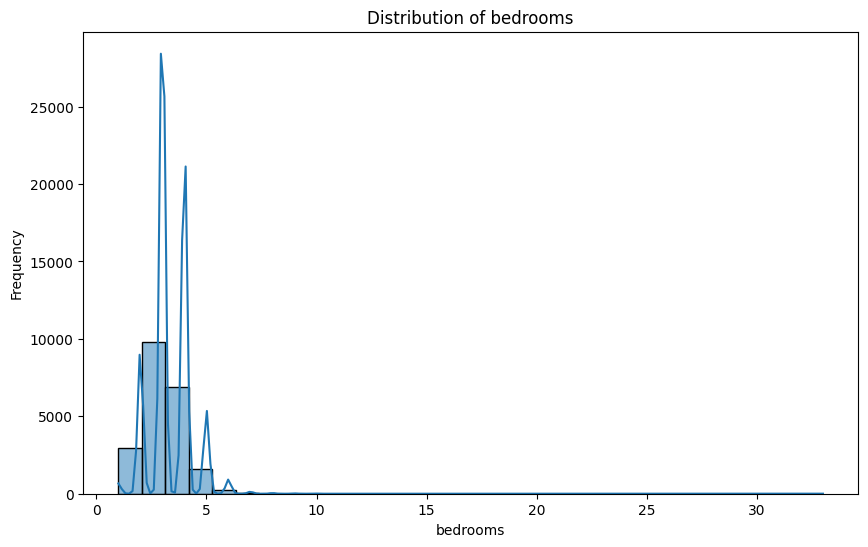

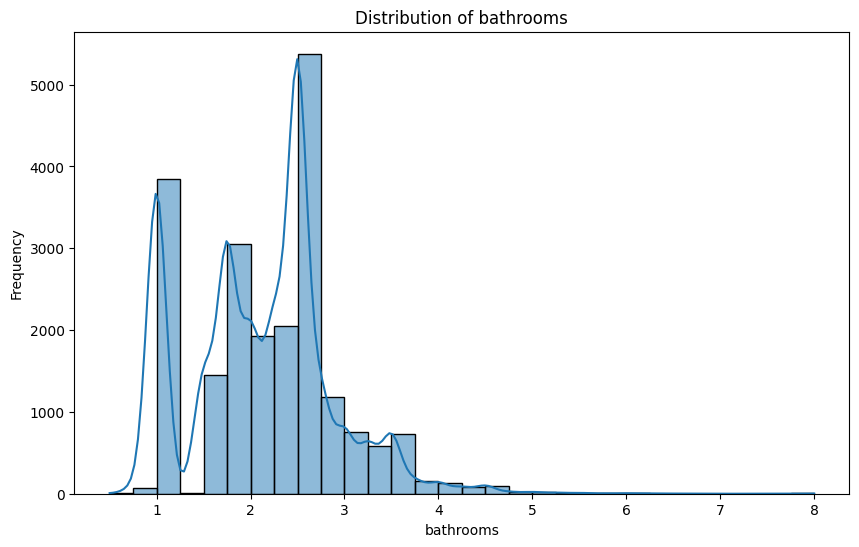

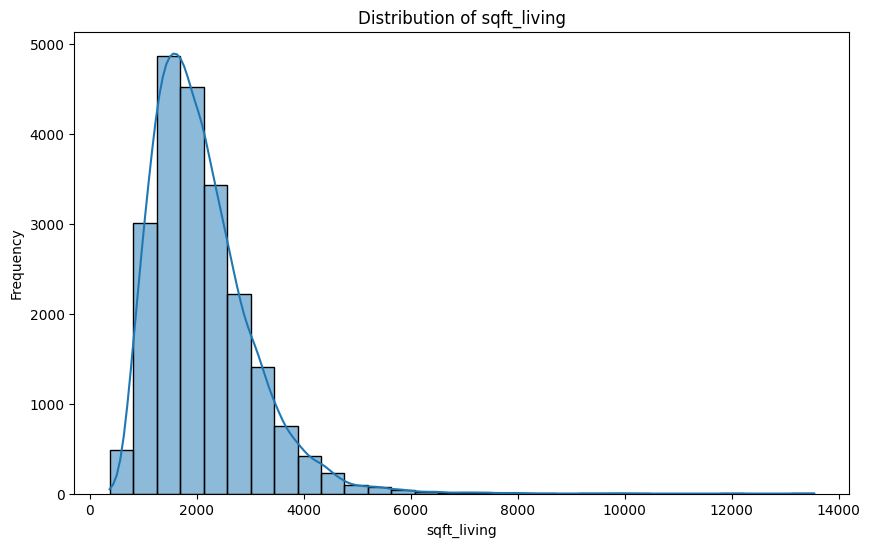

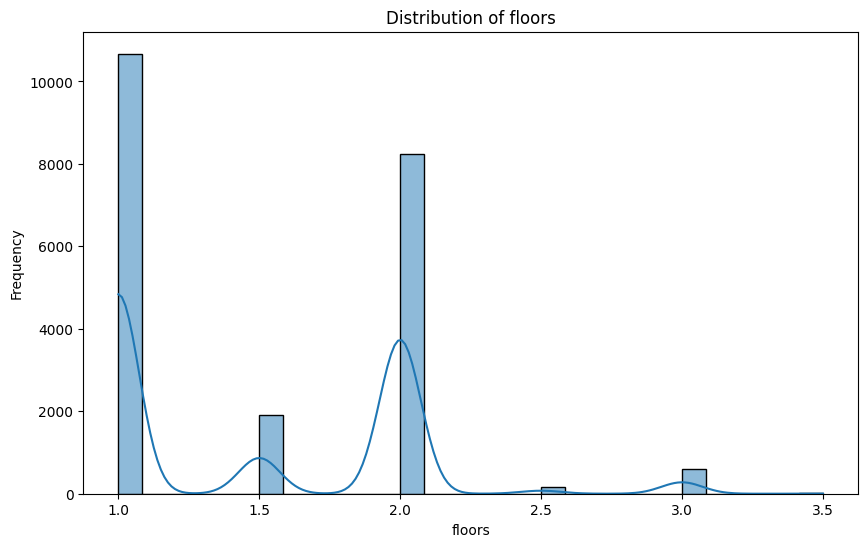

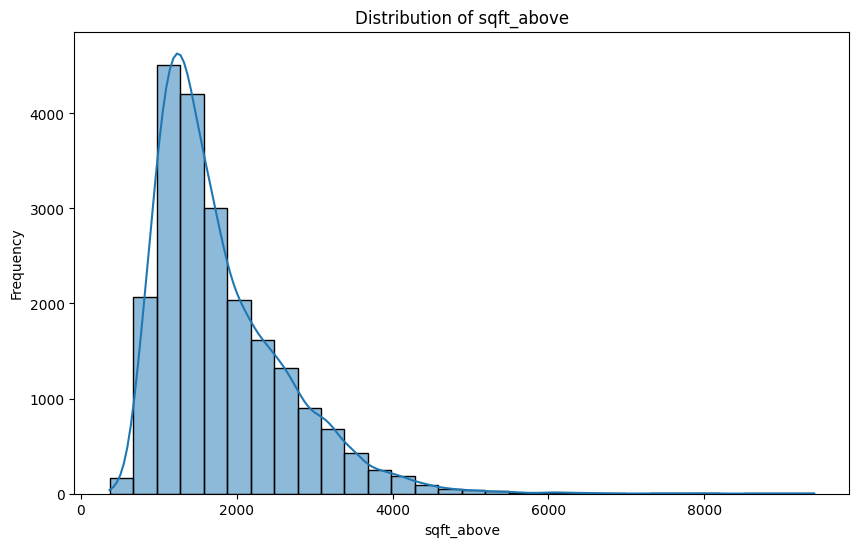

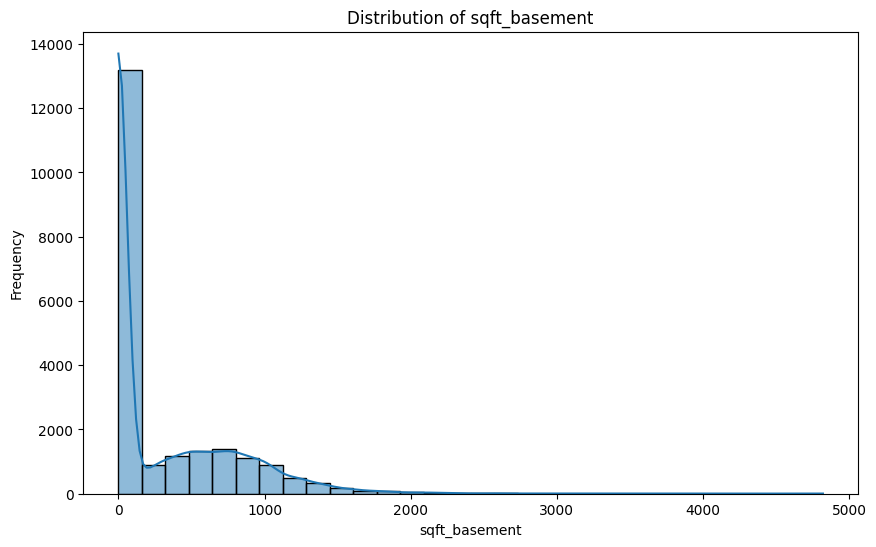

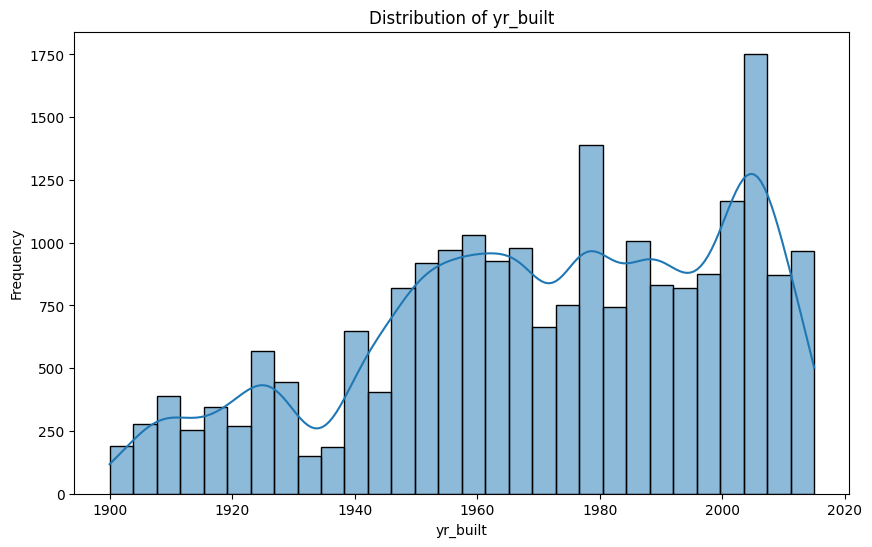

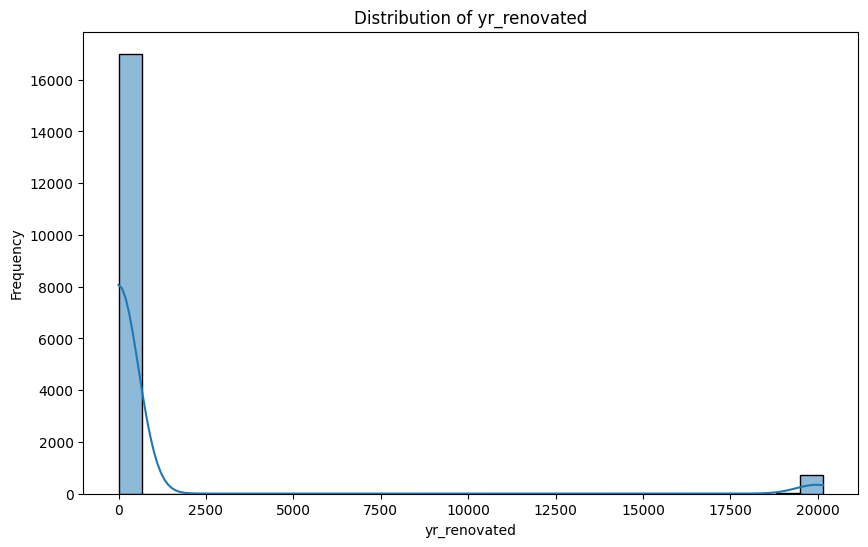

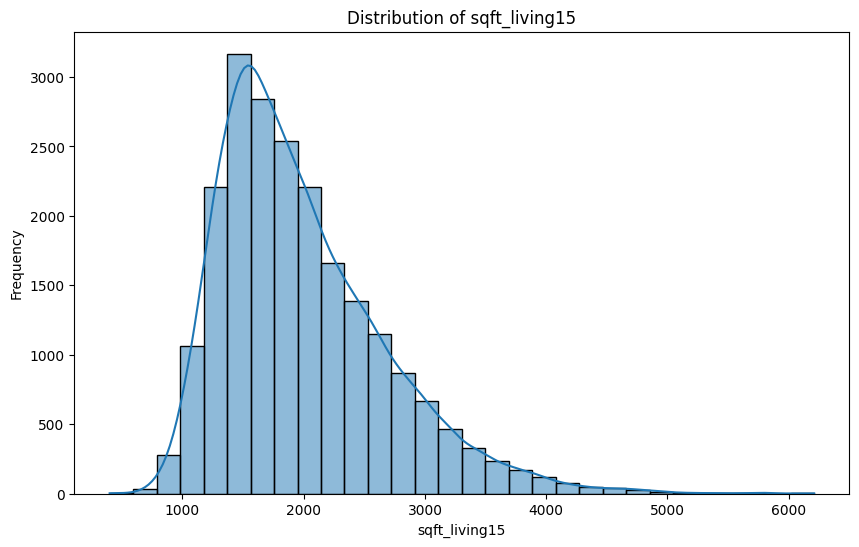

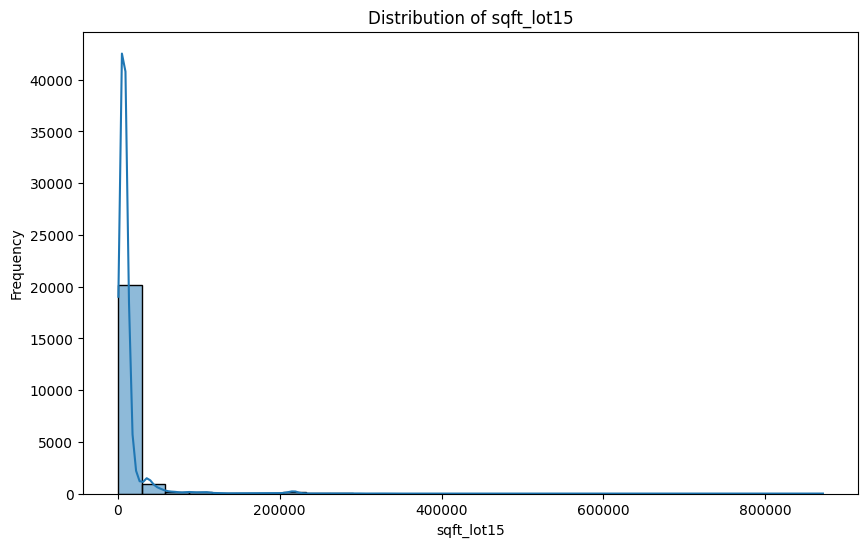

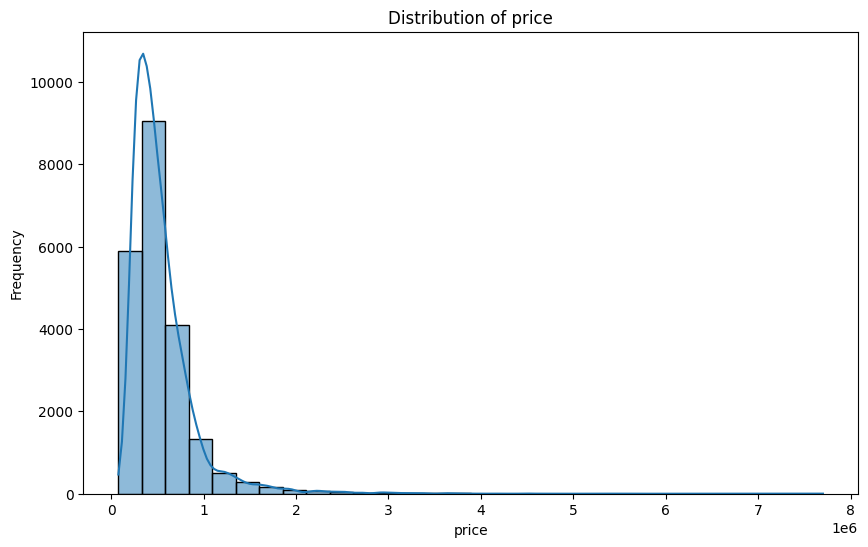

In [8]:
# List of continuous variables
continuous_vars = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 
    'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 
    'sqft_lot15', 'price'
]

# Plot histograms for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


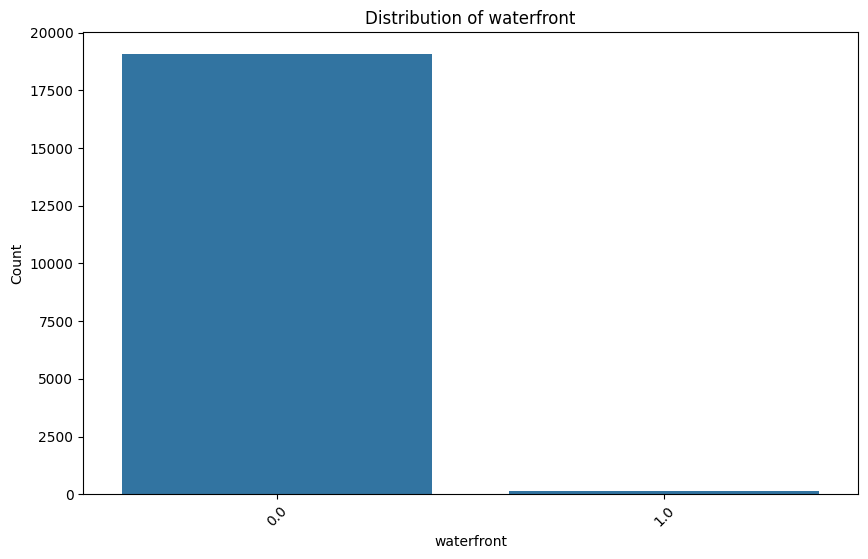

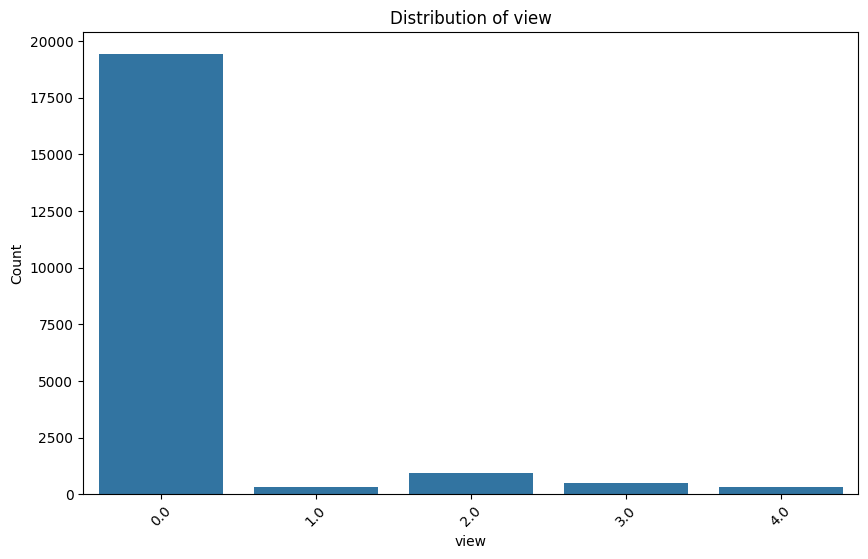

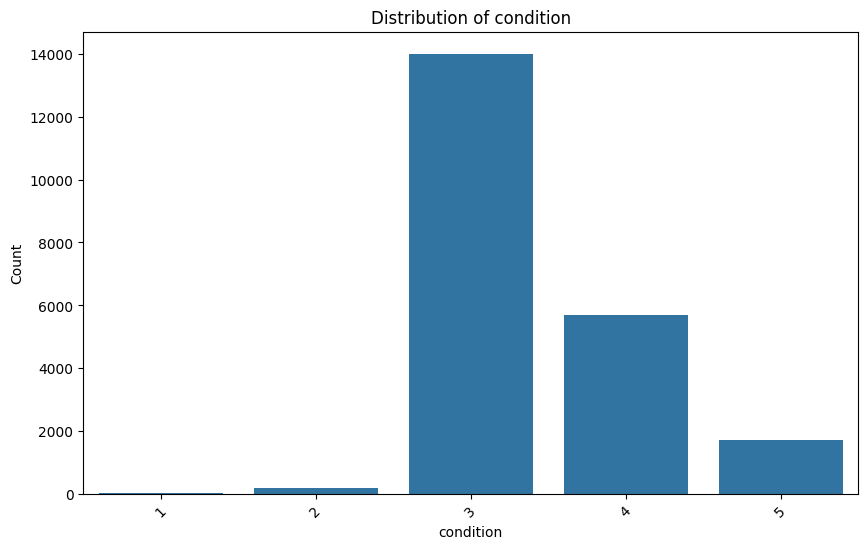

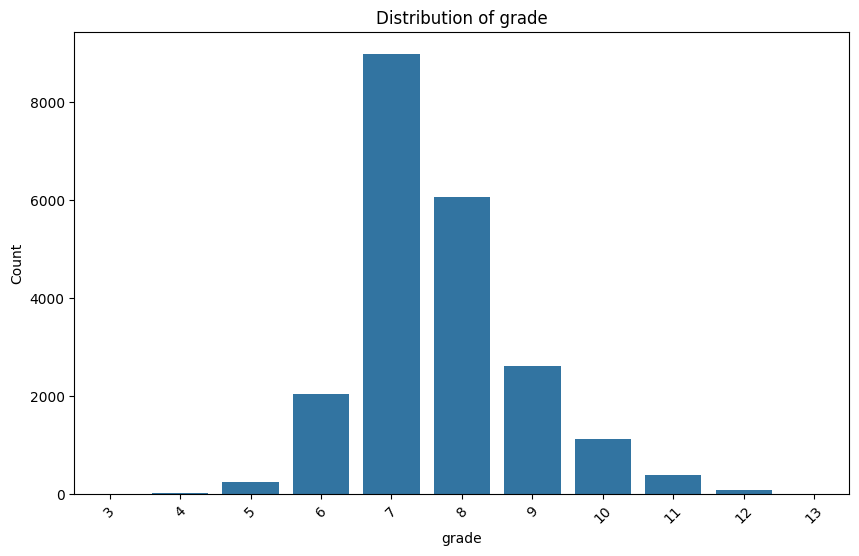

In [9]:
# Categorical variables
categorical_vars = ['waterfront', 'view', 'condition', 'grade',]

# Plot counts for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[var].dropna())
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Cleaning Data

In [10]:
missing_data = data.isnull().sum()
missing_data[missing_data > 0]


waterfront       2391
view               63
sqft_basement     452
yr_renovated     3848
dtype: int64

In [11]:
#Waterfront and View are not relevant
data_cleaned = data.drop(columns=['waterfront', 'view'])

# Impute sqft_basement with the median
data_cleaned['sqft_basement'].fillna(data['sqft_basement'].median(), inplace=True)

# Impute yr_renovated with 0, indicating no renovation
data_cleaned['yr_renovated'].fillna(0, inplace=True)

data_cleaned.head()


,house_id,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sale_id
0,7129300520,3.000,1.000,1180.000,1.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,1
1,6414100192,3.000,2.250,2570.000,2.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2
2,5631500400,2.000,1.000,770.000,1.000,3,6,770.000,0.000,1933,0.000,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,3
3,2487200875,4.000,3.000,1960.000,1.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,4
4,1954400510,3.000,2.000,1680.000,1.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,5


In [12]:
Q1 = data_cleaned['price'].quantile(0.25)
Q3 = data_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_cleaned[(data_cleaned['price'] < lower_bound) | (data_cleaned['price'] > upper_bound)]
print(outliers)


         house_id  bedrooms  bathrooms  sqft_living  floors  condition  grade  \
5      7237550310     4.000      4.500     5420.000   1.000          3     11   
21     2524049179     3.000      2.750     3050.000   1.000          3      9   
49      822039084     3.000      2.500     2753.000   1.000          5      9   
69     1802000060     5.000      2.250     3200.000   1.000          3      8   
125    4389200955     4.000      2.750     2750.000   1.500          3      8   
...           ...       ...        ...          ...     ...        ...    ...   
21552   524059330     4.000      3.500     3830.000   2.000          3     10   
21560  9253900271     5.000      4.500     4850.000   2.000          3     10   
21574  7430200100     4.000      3.500     4910.000   1.500          3     11   
21581   191100405     4.000      3.250     3410.000   2.000          3     10   
21584   249000205     5.000      3.750     4470.000   2.000          3     11   

       sqft_above  sqft_bas

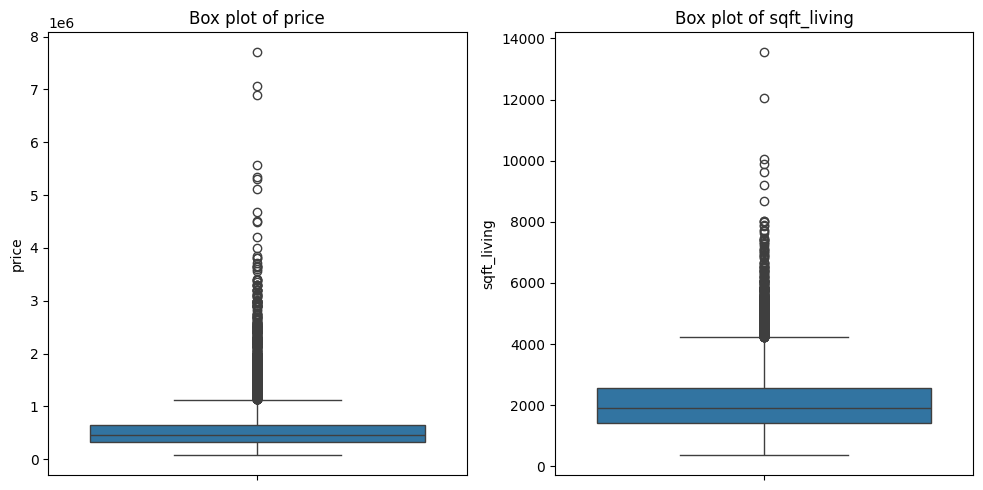

In [13]:
# Define the features you want to plot
features = ['price', 'sqft_living']

# Create box plots for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=feature, data=data_cleaned)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()


In this analysis, we chose not to remove outliers, as the client specifically owns high-value properties. These extreme values represent a significant portion of the market that is relevant to the client's interests. By retaining these outliers, we ensure that our analysis captures the full range of property values, including the more expensive homes that are crucial for informed decision-making.

Data Transformation

In [14]:

# Convert 'date' column to datetime format in both DataFrames
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], format='%Y-%m-%d')

# Optional: Extract year and month from the date column if needed
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data_cleaned['year'] = data_cleaned['date'].dt.year
data_cleaned['month'] = data_cleaned['date'].dt.month
data_cleaned.head()


,house_id,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sale_id,year,month
0,7129300520,3.000,1.000,1180.000,1.000,3,7,1180.000,0.000,1955,...,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,1,2014,10
1,6414100192,3.000,2.250,2570.000,2.000,3,7,2170.000,400.000,1951,...,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2,2014,12
2,5631500400,2.000,1.000,770.000,1.000,3,6,770.000,0.000,1933,...,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,3,2015,2
3,2487200875,4.000,3.000,1960.000,1.000,5,7,1050.000,910.000,1965,...,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,4,2014,12
4,1954400510,3.000,2.000,1680.000,1.000,3,8,1680.000,0.000,1987,...,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,5,2015,2


In [15]:
#data transformation for yr_renovated

# Approach 1: Replace 0 values in yr_renovated with yr_built
data_cleaned['yr_renovated'] = data_cleaned['yr_renovated'].replace(0, pd.NA)  # Replace 0 with NA
data_cleaned['yr_renovated'] = data_cleaned['yr_renovated'].fillna(data_cleaned['yr_built'])  # Fill NA with yr_built

# Approach 2: Create a binary indicator for renovation
data_cleaned['renovated'] = (data_cleaned['yr_renovated'] != data_cleaned['yr_built']).astype(int)

# Display the DataFrame to verify changes
data_cleaned.head()


,house_id,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,...,lat,long,sqft_living15,sqft_lot15,date,price,sale_id,year,month,renovated
0,7129300520,3.000,1.000,1180.000,1.000,3,7,1180.000,0.000,1955,...,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,1,2014,10,0
1,6414100192,3.000,2.250,2570.000,2.000,3,7,2170.000,400.000,1951,...,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2,2014,12,1
2,5631500400,2.000,1.000,770.000,1.000,3,6,770.000,0.000,1933,...,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,3,2015,2,0
3,2487200875,4.000,3.000,1960.000,1.000,5,7,1050.000,910.000,1965,...,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,4,2014,12,0
4,1954400510,3.000,2.000,1680.000,1.000,3,8,1680.000,0.000,1987,...,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,5,2015,2,0


In [46]:
# Define central ZIP codes
central_zipcodes = [98101, 98102, 98104, 98109, 98112]

# Check the number of entries before filtering
original_count = len(data_cleaned)
print(f"Original number of entries: {original_count}")

# Add a column to indicate whether the ZIP code is in the central area
data_cleaned['in_center'] = data_cleaned['zipcode'].isin(central_zipcodes)

# Filter the DataFrame to include only central ZIP codes
central_data = data_cleaned[data_cleaned['in_center']]

# Check the number of entries after filtering
filtered_count = len(central_data)
print(f"Number of entries in central areas: {filtered_count}")



Original number of entries: 21597
Number of entries in central areas: 482


The number of entries are high enough.

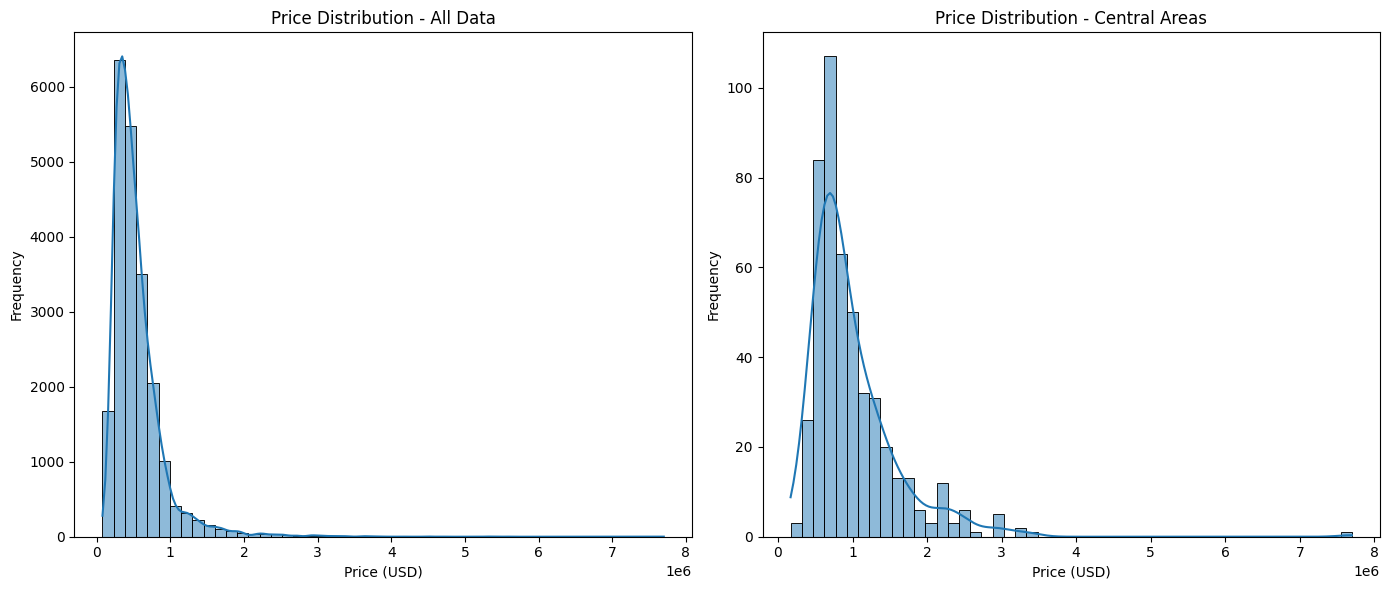

In [47]:


# Plot the distribution of prices before filtering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution - All Data')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Plot the distribution of prices after filtering for central areas
plt.subplot(1, 2, 2)
sns.histplot(central_data['price'], bins=50, kde=True)
plt.title('Price Distribution - Central Areas')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



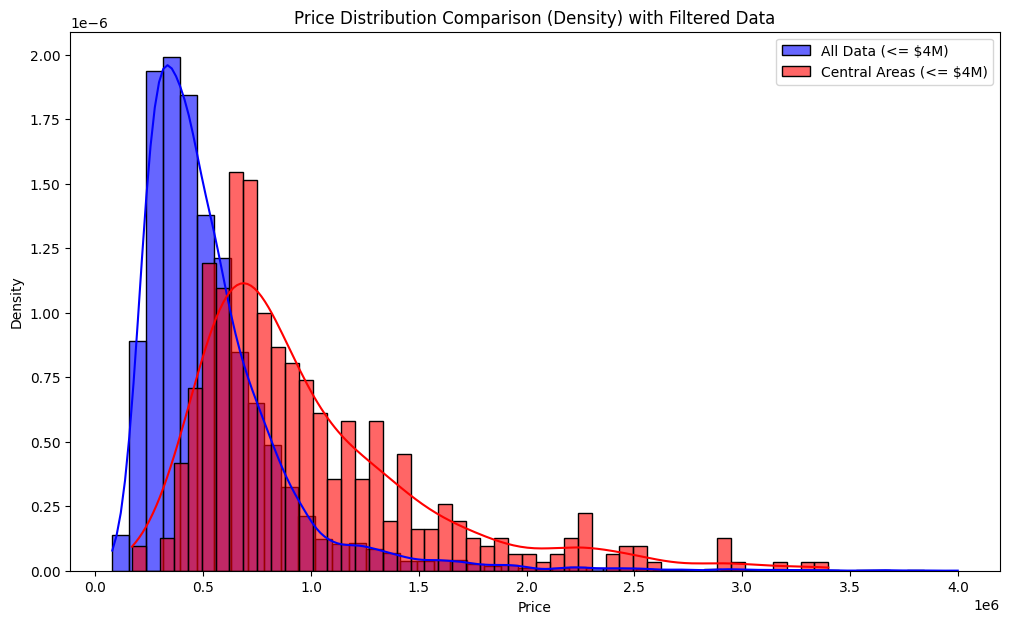

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to keep only prices up to 4 million USD
filtered_data = data_cleaned[data_cleaned['price'] <= 4000000]
filtered_central_data = central_data[central_data['price'] <= 4000000]

# Create a figure
plt.figure(figsize=(12, 7))

# Plot the price distribution for all data (up to 4 million USD)
sns.histplot(filtered_data['price'], bins=50, kde=True, color='blue', label='All Data (<= $4M)', alpha=0.6, stat='density')

# Plot the price distribution for central areas (up to 4 million USD)
sns.histplot(filtered_central_data['price'], bins=50, kde=True, color='red', label='Central Areas (<= $4M)', alpha=0.6, stat='density')

# Add title and legend
plt.title('Price Distribution Comparison (Density) with Filtered Data')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [49]:
# Calculate key statistics for the filtered data
filtered_stats = filtered_data['price'].describe()

# Calculate key statistics for the filtered central data
central_filtered_stats = central_data['price'].describe()

# Create a table with the statistics
import pandas as pd

# Create a DataFrame to organize the statistics
stats_table = pd.DataFrame({
    'All Data (<= $4M)': filtered_stats,
    'Central Areas (<= $4M)': central_filtered_stats
})

# Display the statistics table
stats_table


,All Data (<= $4M),Central Areas (<= $4M)
count,21586.000,482.000
mean,537752.946,1004929.390
std,348834.861,622680.500
min,78000.000,169317.000
25%,322000.000,627525.000
50%,450000.000,823750.000
75%,645000.000,1200000.000
max,4000000.000,7700000.000


Comparison by filtered vs unfiltered data. In the city center the house prices are higher and the distribution is broader.

This step filters the dataset to include only properties in specified central ZIP codes with prices exceeding $800,000, counts the number of these high-value properties, checks if the remaining data points are sufficient for analysis.

In [50]:
# Define central ZIP codes
central_zipcodes = [98101, 98102, 98104, 98109, 98112]  # List of central ZIP codes

# Filter data for central areas and prices above $800,000
high_price_center_data = data_cleaned[(data_cleaned['zipcode'].isin(central_zipcodes)) & 
                                      (data_cleaned['price'] > 800000)]

# Count the number of remaining data points
remaining_data_count = len(high_price_center_data)

# Print the number of properties in central areas with a price above $800,000
print("Number of properties in central areas with a price above $800,000:", remaining_data_count)



Number of properties in central areas with a price above $800,000: 246



The process involves plotting the median house prices over time by grouping the data by year and month, converting the dates to a datetime format, and visualizing the trends to analyze how high-value properties in central areas have appreciated or depreciated over time.

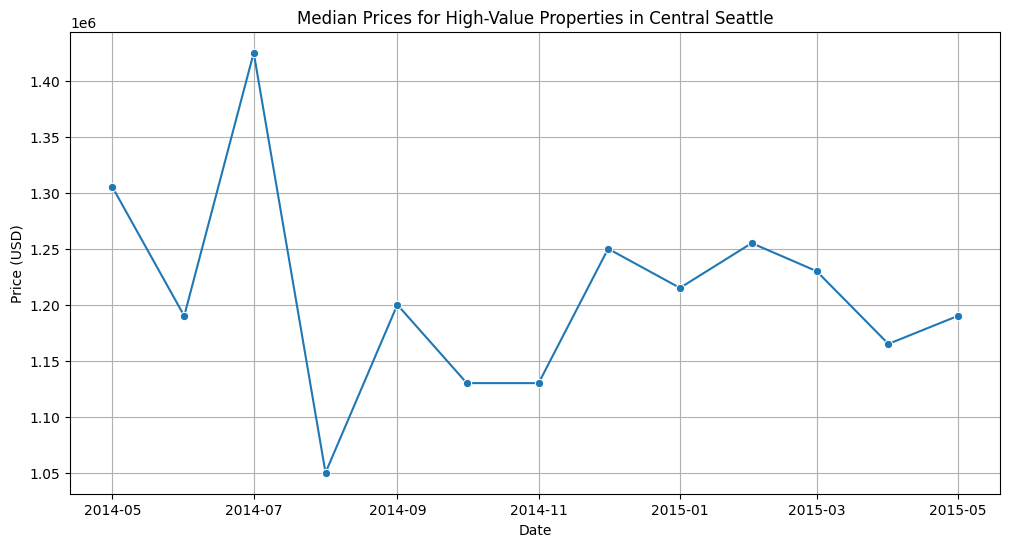

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define central ZIP codes
central_zipcodes = [98101, 98102, 98104, 98109, 98112]  # List of central ZIP codes

# Filter data for central areas and prices above $800,000
high_price_center_data = data_cleaned[(data_cleaned['zipcode'].isin(central_zipcodes)) & 
                                      (data_cleaned['price'] > 800000)]

# Convert 'date' to datetime format
high_price_center_data['date'] = pd.to_datetime(high_price_center_data['date'])

# Group by year and month, then calculate the median price
price_trend = high_price_center_data.groupby(['year', 'month'])['price'].median().reset_index()

# Create a new datetime index for visualization
price_trend['date'] = pd.to_datetime(price_trend[['year', 'month']].assign(day=1))

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trend, x='date', y='price', marker='o')
plt.title('Median Prices for High-Value Properties in Central Seattle')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()



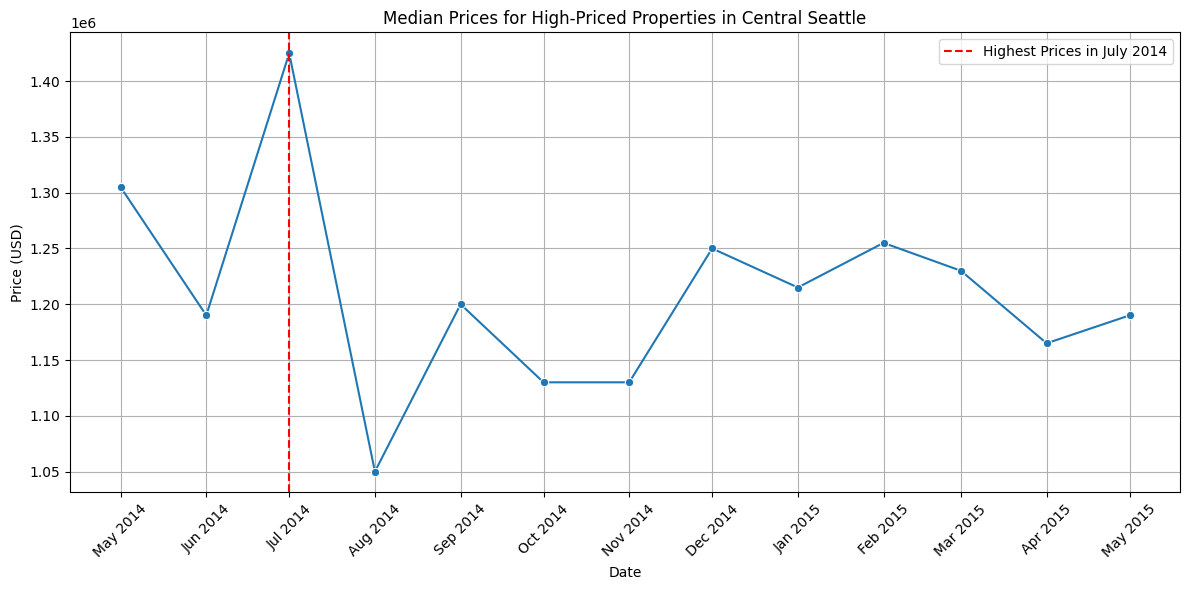

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for central areas
central_zipcodes = [98101, 98102, 98104, 98109, 98112]  # List of central zip codes

# Filter data for central areas with prices above 800,000 USD
high_price_center_data = data_cleaned[(data_cleaned['zipcode'].isin(zipcodes_center)) & 
                                      (data_cleaned['price'] > 800000)]

# Convert 'date' to datetime format
high_price_center_data['date'] = pd.to_datetime(high_price_center_data['date'])

# Group by year and month, then calculate the median price
price_trend = high_price_center_data.groupby(['year', 'month'])['price'].median().reset_index()

# Create a new datetime index for visualization
price_trend['date'] = pd.to_datetime(price_trend[['year', 'month']].assign(day=1))

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=price_trend, x='date', y='price', marker='o')

# Highlight July 2014
highlight = price_trend[(price_trend['year'] == 2014) & (price_trend['month'] == 7)]
plt.axvline(x=highlight['date'].values[0], color='red', linestyle='--', label='Highest Prices in July 2014')

# Set background color
ax.set_facecolor('white')

# Format the x-axis to show month names
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Rotate and format x-axis labels
plt.xticks(rotation=45)

# Add labels and title
plt.title('Median Prices for High-Priced Properties in Central Seattle')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In July the highest prices are achieved.

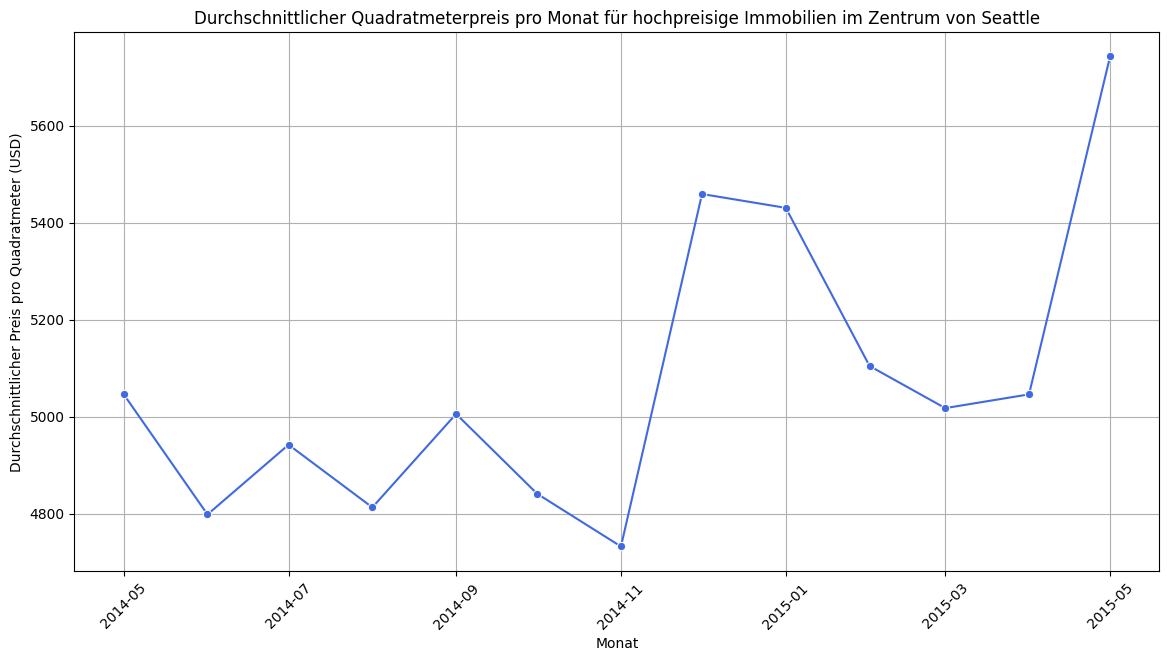

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quadratmeterpreis berechnen
high_price_center_data['price_per_sqm'] = high_price_center_data['price'] / (high_price_center_data['sqft_living'] * 0.092903)

# Datum sicherstellen und Jahr und Monat extrahieren
high_price_center_data['date'] = pd.to_datetime(high_price_center_data['date'])
high_price_center_data['year_month'] = high_price_center_data['date'].dt.to_period('M').dt.to_timestamp()

# Durchschnittlichen Quadratmeterpreis pro Monat berechnen
monthly_avg_price_per_sqm = high_price_center_data.groupby('year_month')['price_per_sqm'].mean().reset_index()

# Plot erstellen
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg_price_per_sqm, x='year_month', y='price_per_sqm', marker='o', color='royalblue')
plt.title('Durchschnittlicher Quadratmeterpreis pro Monat für hochpreisige Immobilien im Zentrum von Seattle')
plt.xlabel('Monat')
plt.ylabel('Durchschnittlicher Preis pro Quadratmeter (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


qm prices increased during turn of the year 2014/2015.

Hypothesis 2 comparison renovation

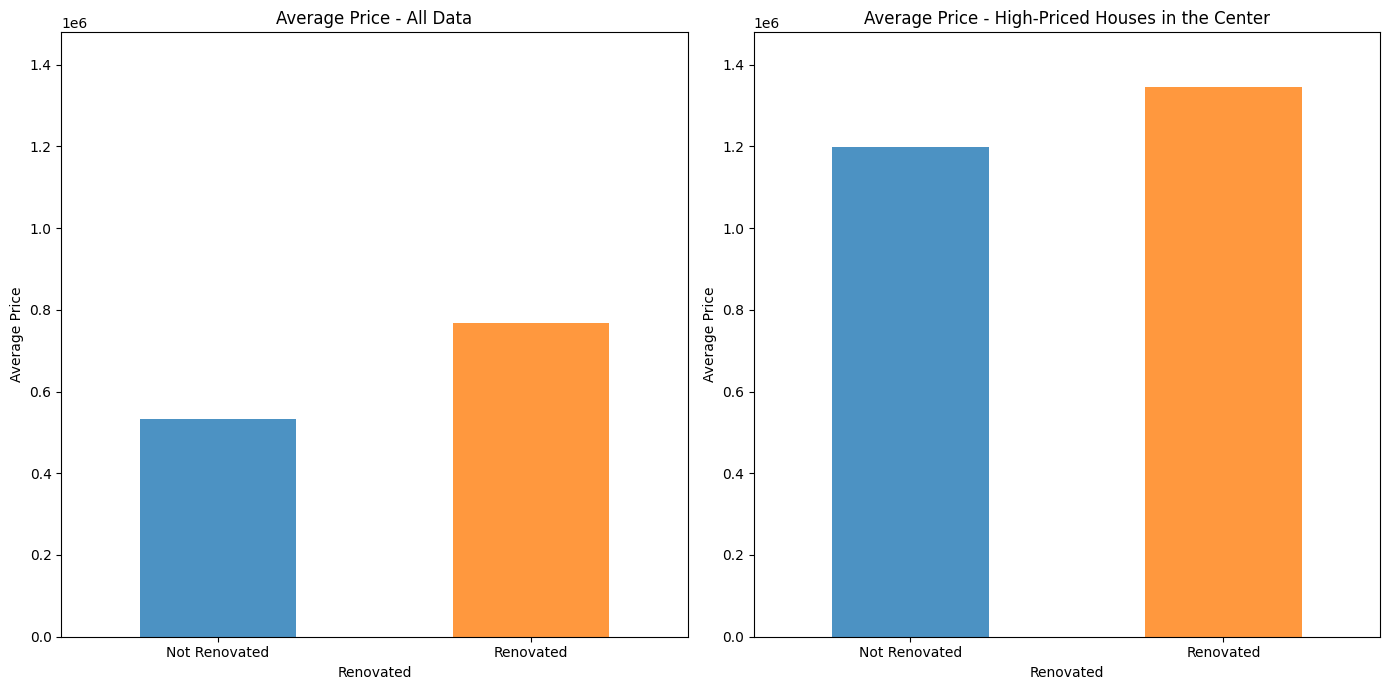

In [44]:
import matplotlib.pyplot as plt

# Calculate average prices for all data
avg_price_all = data_cleaned.groupby('renovated')['price'].mean()

# Calculate average prices for high-priced houses in the center
avg_price_center = data_high_price.groupby('renovated')['price'].mean()

# Create bar charts with the same axis length
plt.figure(figsize=(14, 7))

# Maximum y-axis length based on the two groups, with a 10% margin added
max_y = max(avg_price_all.max(), avg_price_center.max()) * 1.1

# Define colors for bars
colors = ['#1f77b4', '#ff7f0e']  # Blue for not renovated, Orange for renovated

# Plot for all data
plt.subplot(1, 2, 1)
avg_price_all.plot(kind='bar', color=colors, alpha=0.8)
plt.title('Average Price - All Data')
plt.xlabel('Renovated')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['Not Renovated', 'Renovated'], rotation=0)
plt.ylim(0, max_y)

# Plot for high-priced houses in the center
plt.subplot(1, 2, 2)
avg_price_center.plot(kind='bar', color=colors, alpha=0.8)
plt.title('Average Price - High-Priced Houses in the Center')
plt.xlabel('Renovated')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['Not Renovated', 'Renovated'], rotation=0)
plt.ylim(0, max_y)

plt.tight_layout()
plt.show()


The difference for all data is higher. Renovation less important for houses in the central area.

Hypothese 3 geographic data

In [42]:
import pandas as pd
import plotly.express as px

# Assuming your data is stored in a DataFrame called data_high_price
df_import = data_high_price

# Filter the DataFrame to include only the specified zip codes
zip_codes_of_interest = [98101, 98102, 98104, 98109, 98112]
df_filtered = df_import[df_import['zipcode'].isin(zip_codes_of_interest)]

# Calculate the average latitude and longitude to center the map
avg_latitude = df_filtered['lat'].mean()
avg_longitude = df_filtered['long'].mean()

# URL for the GeoJSON file for Washington state zip codes
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Create a choropleth map based on the average price per zip code
fig = px.choropleth_mapbox(df_filtered, 
                           geojson=url_geojson, 
                           locations='zipcode', 
                           featureidkey='properties.ZCTA5CE10',
                           color='price',  # Color by the price
                           mapbox_style="open-street-map",
                           zoom=12, 
                           center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=600,
                           width=800
                          )

# Create a scatter map for individual house prices
fig2 = px.scatter_mapbox(df_filtered, 
                         lat="lat", 
                         lon="long", 
                         color="price",  # Color by the price
                         size="price",   # Size by the price
                         zoom=12, 
                         height=600, 
                         width=800, 
                         hover_data=['price'],
                         mapbox_style='open-street-map')

# Combine the scatter plot with the choropleth map
for trace in fig2.data:
    fig.add_trace(trace)

# Show the combined map
fig.show()



In [43]:
import pandas as pd
import plotly.express as px

# Assuming your data is stored in a DataFrame called data_high_price
df_import = data_high_price

# Filter the DataFrame to include only the specified zip codes
zip_codes_of_interest = [98101, 98102, 98104, 98109, 98112]
df_filtered = df_import[df_import['zipcode'].isin(zip_codes_of_interest)]

# Calculate the average latitude and longitude to center the map
avg_latitude = df_filtered['lat'].mean()
avg_longitude = df_filtered['long'].mean()

# URL for the GeoJSON file for Washington state zip codes
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Create a choropleth map based on the average price per square meter
fig = px.choropleth_mapbox(df_filtered, 
                           geojson=url_geojson, 
                           locations='zipcode', 
                           featureidkey='properties.ZCTA5CE10',
                           color='price_per_sqm',  # Color by price per square meter
                           mapbox_style="open-street-map",
                           zoom=12, 
                           center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=600,
                           width=800
                          )

# Create a scatter map for individual house price per square meter
fig2 = px.scatter_mapbox(df_filtered, 
                         lat="lat", 
                         lon="long", 
                         color="price_per_sqm",  # Color by price per square meter
                         size="price_per_sqm",   # Size by price per square meter
                         zoom=12, 
                         height=600, 
                         width=800, 
                         hover_data=['price_per_sqm'],
                         mapbox_style='open-street-map')

# Combine the scatter plot with the choropleth map
for trace in fig2.data:
    fig.add_trace(trace)

# Show the combined map
fig.show()


qm prices visualize the map better. Broadmoor and Madison Park are very expensive areas